In [8]:
# Importando os pacotes necessários

%matplotlib inline

import os
import random
import numpy as np
import keras
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Model

from six.moves import urllib
import gzip

from shutil import copyfile

# import the needed packages
# import matplotlib.pyplot as plt
import matplotlib.image as img
from tensorflow import keras

In [9]:
from google.colab import files
uploaded = files.upload()

Saving kagglecatsanddogs_5340.zip to kagglecatsanddogs_5340.zip


In [10]:

!ls

kagglecatsanddogs_5340	kagglecatsanddogs_5340.zip  sample_data


In [12]:
# exibindo a quantidade de imagem 

print(len(os.listdir('/content/kagglecatsanddogs_5340/PetImages/Cat')))
print(len(os.listdir('/content/kagglecatsanddogs_5340/PetImages/Dog')))

52
52


In [13]:
# Criando diretórios para separar as imagens em Treino e Teste

try:
    os.mkdir('cats-v-dogs')
    os.mkdir('cats-v-dogs/training')
    os.mkdir('cats-v-dogs/testing')
    os.mkdir('cats-v-dogs/training/cats')
    os.mkdir('cats-v-dogs/training/dogs')
    os.mkdir('cats-v-dogs/testing/cats')
    os.mkdir('cats-v-dogs/testing/dogs')
except OSError:
    pass

In [16]:
#  Função para separar o conjunto de dados em treino e teste
#  E limpando as imagens com comprimento zero

def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    testing_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    testing_set = shuffled_set[-testing_length:]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in testing_set:
        this_file = SOURCE + filename
        destination = TESTING + filename
        copyfile(this_file, destination)


CAT_SOURCE_DIR = "kagglecatsanddogs_5340/PetImages/Cat/"
TRAINING_CATS_DIR = "cats-v-dogs/training/cats/"
TESTING_CATS_DIR = "cats-v-dogs/testing/cats/"
DOG_SOURCE_DIR = "kagglecatsanddogs_5340/PetImages/Dog/"
TRAINING_DOGS_DIR = "cats-v-dogs/training/dogs/"
TESTING_DOGS_DIR = "cats-v-dogs/testing/dogs/"

split_size = .9
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)

In [17]:
# exibindo a quantidade de imagem por diretórios


print(len(os.listdir('cats-v-dogs/training/cats/')))
print(len(os.listdir('cats-v-dogs/training/dogs/')))
print(len(os.listdir('cats-v-dogs/testing/cats/')))
print(len(os.listdir('cats-v-dogs/testing/dogs/')))

52
46
12
6


In [19]:
# define e move para o diretório do dataset
datasetdir = '/content/kagglecatsanddogs_5340/PetImages'
os.chdir(datasetdir)


# atalho para a classe ImageDataGenerator
ImageDataGenerator = keras.preprocessing.image.ImageDataGenerator

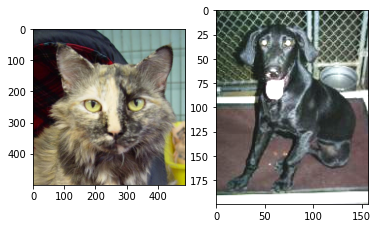

In [22]:
plt.subplot(1,2,1)
plt.imshow(img.imread('Cat/10.jpg'))
plt.subplot(1,2,2)
plt.imshow(img.imread('Dog/50.jpg'))

In [23]:
images = []
for i in range(10):
  im = img.imread('Cat/50.jpg'.format(i))
  images.append(im)
  print('image shape', im.shape, 'maximum color level', im.max())

image shape (196, 300, 3) maximum color level 255
image shape (196, 300, 3) maximum color level 255
image shape (196, 300, 3) maximum color level 255
image shape (196, 300, 3) maximum color level 255
image shape (196, 300, 3) maximum color level 255
image shape (196, 300, 3) maximum color level 255
image shape (196, 300, 3) maximum color level 255
image shape (196, 300, 3) maximum color level 255
image shape (196, 300, 3) maximum color level 255
image shape (196, 300, 3) maximum color level 255


In [24]:
# função auxiliar para carregar a imagem e devolvê-la e inserir o vetor
def get_image(path):
    img = image.load_img(path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return img, x

In [25]:
gen = ImageDataGenerator()

In [26]:
iterator = gen.flow_from_directory(
    os.getcwd(), 
    target_size=(256,256), 
    classes=('Dog','Cat')
)

# Encontrado 102 imagens pertencentes a 2 classes.

Found 102 images belonging to 2 classes.


In [27]:
# podemos adivinhar que o iterador tem uma próxima função,
# porque todos os iteradores python têm um.
 
batch = iterator.next()
len(batch)

2

In [28]:
# Verificando os tipos lote dos dois elementos

print(type(batch[0]))
print(type(batch[1]))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [29]:
# Imprimindo a forma e o tipo das duas matrizes numpy.

print(batch[0].shape)
print(batch[0].dtype)
print(batch[0].max())
print(batch[1].shape)
print(batch[1].dtype)

(32, 256, 256, 3)
float32
255.0
(32, 2)
float32


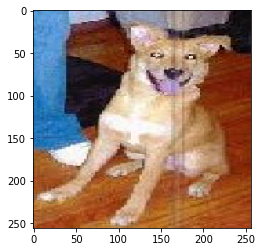

In [30]:
# precisamos converter o array de imagens para inteiros
# antes de plotar como imshow ou pega arrays de inteiros,
# ou arrays de floats normalizados para 1.

plt.imshow(batch[0][0].astype(int))

In [31]:
batch[1][0]

array([1., 0.], dtype=float32)

In [32]:
def plot_images(batch):
    imgs = batch[0]
    labels = batch[1]
    ncols, nrows = 4,8
    fig = plt.figure( figsize=(ncols*3, nrows*3), dpi=90)
    for i, (img,label) in enumerate(zip(imgs,labels)):
      plt.subplot(nrows, ncols, i+1)
      plt.imshow(img.astype(int))
      assert(label[0]+label[1]==1.)
      categ = 'Dog' if label[0]>0.5 else 'Cat'
      plt.title( '{} {}'.format(str(label), categ))
      plt.axis('off')

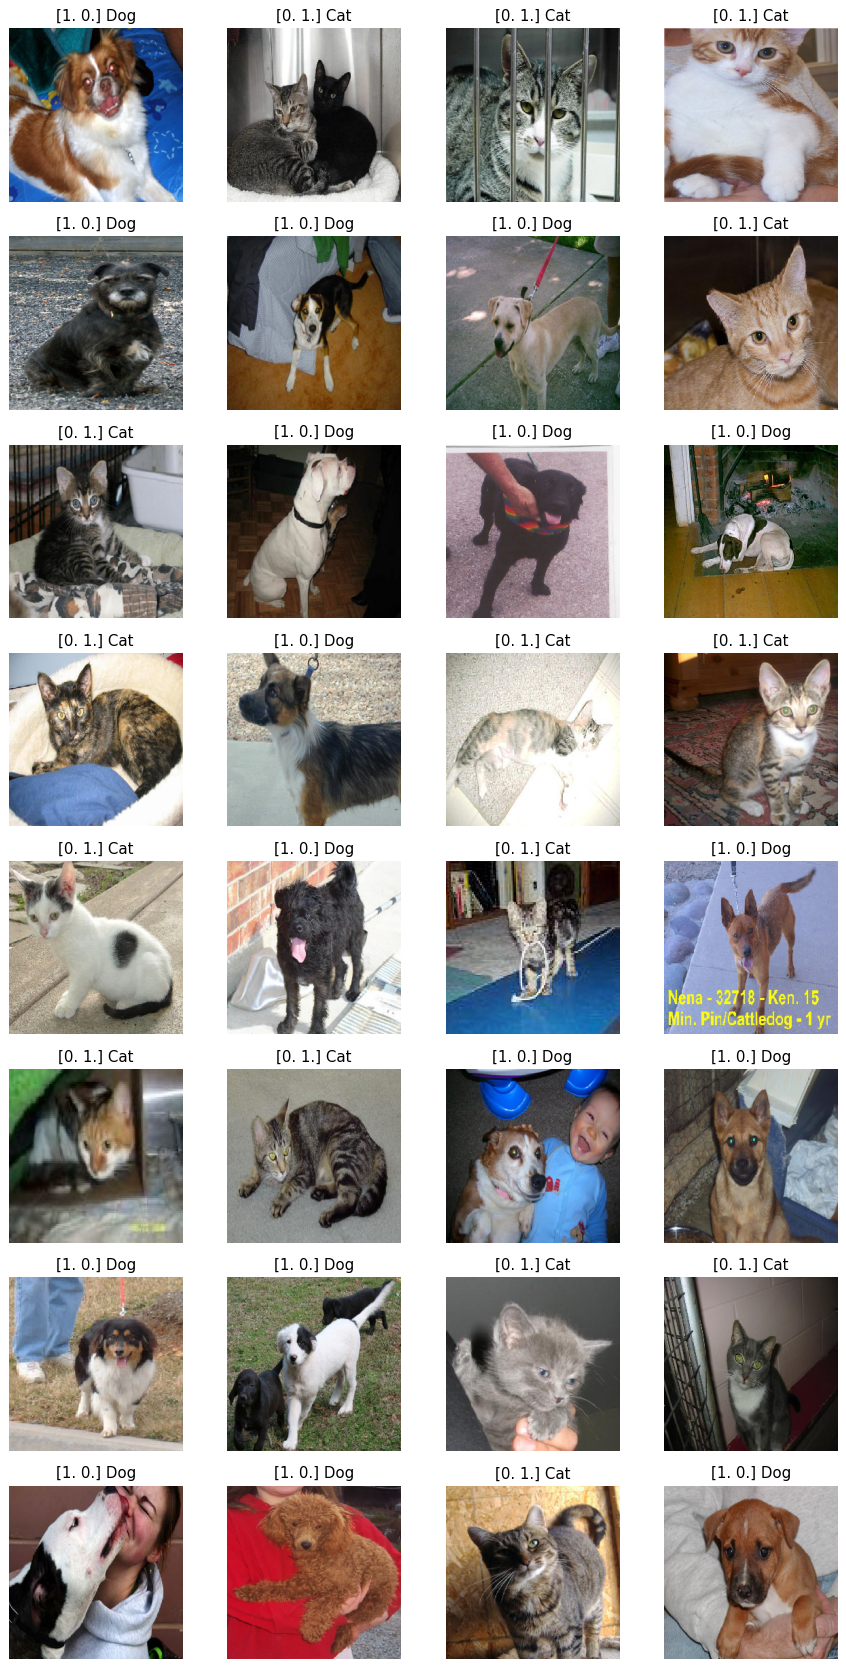

In [33]:
plot_images(iterator.next())

In [34]:
# Dividindo as amostras de treinamento e validação com ImageDataGenerator

imgdatagen = ImageDataGenerator(
    rescale = 1/255., 
    validation_split = 0.2,
)

In [36]:
batch_size = 8
height, width = (256,256)

TRAINING_DIR = "/content/cats-v-dogs/training/"
train_dataset = imgdatagen.flow_from_directory(
    TRAINING_DIR,
    target_size = (height, width), 
    classes = ('dogs','cats'),
    batch_size = batch_size,
    subset = 'training'
)

VALIDATION_DIR = "/content/cats-v-dogs/testing/"
val_dataset = imgdatagen.flow_from_directory(
    VALIDATION_DIR,
    target_size = (height, width), 
    classes = ('dogs','cats'),
    batch_size = batch_size,
    subset = 'validation'
)

Found 77 images belonging to 2 classes.
Found 3 images belonging to 2 classes.


In [37]:
# rede neural convolucional simples
# As redes neurais convolucionais profundas são a escolha certa quando se trata de classificar imagens

model = keras.models.Sequential()

initializers = {
    
}
model.add( 
    keras.layers.Conv2D(
        24, 5, input_shape=(256,256,3), 
        activation='relu', 
    )
)
model.add( keras.layers.MaxPooling2D(2) )
model.add( 
    keras.layers.Conv2D(
        48, 5, activation='relu', 
    )
)
model.add( keras.layers.MaxPooling2D(2) )
model.add( 
    keras.layers.Conv2D(
        96, 5, activation='relu', 
    )
)
model.add( keras.layers.Flatten() )
model.add( keras.layers.Dropout(0.9) )

model.add( keras.layers.Dense(
    2, activation='softmax',
    )
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 252, 252, 24)      1824      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 126, 24)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 48)      28848     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 61, 61, 48)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 57, 57, 96)        115296    
                                                                 
 flatten (Flatten)           (None, 311904)            0

In [38]:
model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.Adamax(learning_rate=0.001),
              metrics=['acc'])

In [50]:
history = model.fit(
    train_dataset, 
    validation_data = val_dataset,
    workers=10,
    epochs=10,
)

Epoch 1/10
11/11 [==============================] - 19s 2s/step - loss: 0.6944 - acc: 0.4943 - val_loss: 0.6826 - val_acc: 1.0000
Epoch 2/10
11/11 [==============================] - 20s 2s/step - loss: 0.6866 - acc: 0.5287 - val_loss: 0.6952 - val_acc: 0.0000e+00
Epoch 3/10
11/11 [==============================] - 19s 2s/step - loss: 0.6872 - acc: 0.5402 - val_loss: 0.7132 - val_acc: 0.0000e+00
Epoch 4/10
11/11 [==============================] - 19s 2s/step - loss: 0.6727 - acc: 0.5632 - val_loss: 0.7237 - val_acc: 0.0000e+00
Epoch 5/10
11/11 [==============================] - 21s 2s/step - loss: 0.6647 - acc: 0.6092 - val_loss: 0.7833 - val_acc: 0.0000e+00
Epoch 6/10
11/11 [==============================] - 19s 2s/step - loss: 0.6771 - acc: 0.5747 - val_loss: 0.9772 - val_acc: 0.0000e+00
Epoch 7/10
11/11 [==============================] - 22s 2s/step - loss: 0.6122 - acc: 0.7126 - val_loss: 0.9626 - val_acc: 0.0000e+00
Epoch 8/10
11/11 [==============================] - 19s 2s/step - 

In [51]:
def plot_history(history, yrange):
    '''Plot loss and accuracy as a function of the epoch,
    for the training and validation datasets.
    '''
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Get number of epochs
    epochs = range(len(acc))

    # Plot training and validation accuracy per epoch
    plt.plot(epochs, acc)
    plt.plot(epochs, val_acc)
    plt.title('Training and validation accuracy')
    plt.ylim(yrange)
    
    # Plot training and validation loss per epoch
    plt.figure()

    plt.plot(epochs, loss)
    plt.plot(epochs, val_loss)
    plt.title('Training and validation loss')
    
    plt.show()

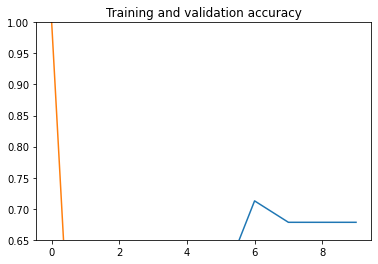

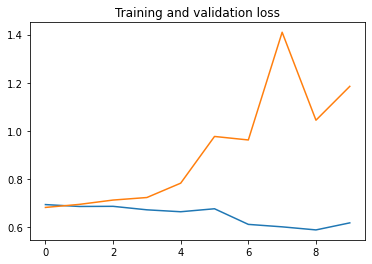

In [52]:
plot_history(history, (0.65, 1.))

In [53]:
imgdatagen = ImageDataGenerator(
    rescale = 1/255., 
    horizontal_flip = True, 
    validation_split = 0.2,
)

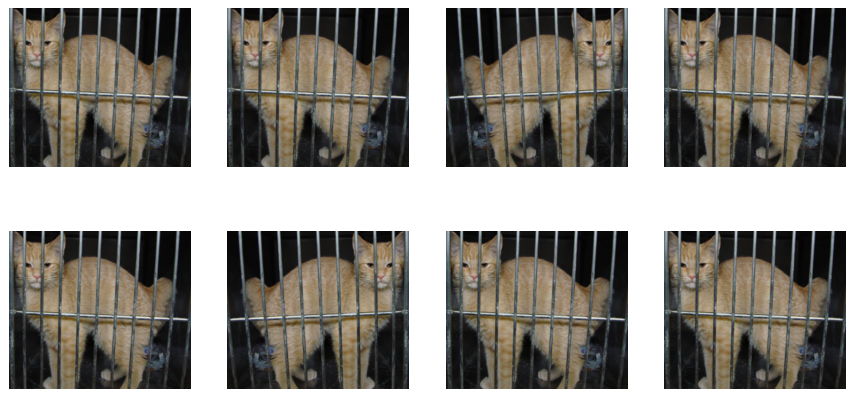

In [54]:
image = img.imread('Cat/15.jpg')

def plot_transform():
    '''apply the transformation 8 times randomly'''
    nrows, ncols = 2,4
    fig = plt.figure(figsize=(ncols*3, nrows*3), dpi=90)
    for i in range(nrows*ncols): 
        timage = imgdatagen.random_transform(image)
        plt.subplot(nrows, ncols, i+1)
        plt.imshow(timage)
        plt.axis('off')
        
plot_transform()

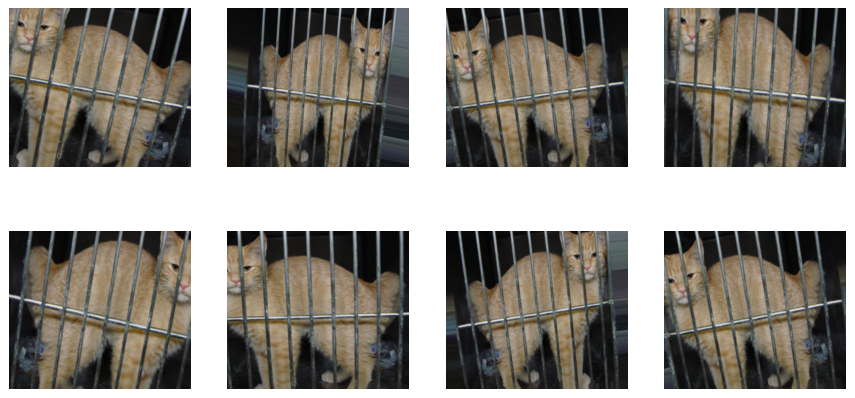

In [55]:
imgdatagen = ImageDataGenerator(
    rescale = 1/255., 
    horizontal_flip = True, 
    zoom_range = 0.3, 
    rotation_range = 15.,
    validation_split = 0.1,
)

plot_transform()

In [56]:
batch_size = 8
height, width = (256,256)

TRAINING_DIR = "/content/cats-v-dogs/training/"
train_dataset = imgdatagen.flow_from_directory(
    TRAINING_DIR,
    target_size = (height, width), 
    classes = ('dogs','cats'),
    batch_size = batch_size,
    subset = 'training'
)

VALIDATION_DIR = "/content/cats-v-dogs/testing/"
val_dataset = imgdatagen.flow_from_directory(
    VALIDATION_DIR,
    target_size = (height, width), 
    classes = ('dogs','cats'),
    batch_size = batch_size,
    subset = 'validation'
)

Found 87 images belonging to 2 classes.
Found 1 images belonging to 2 classes.


In [57]:
model = keras.models.Sequential()

initializers = {
    
}
model.add( 
    keras.layers.Conv2D(
        24, 5, input_shape=(256,256,3), 
        activation='relu', 
    )
)
model.add( keras.layers.MaxPooling2D(2) )
model.add( 
    keras.layers.Conv2D(
        48, 5, activation='relu', 
    )
)
model.add( keras.layers.MaxPooling2D(2) )
model.add( 
    keras.layers.Conv2D(
        96, 5, activation='relu', 
    )
)
model.add( keras.layers.Flatten() )
model.add( keras.layers.Dropout(0.2) )

model.add( keras.layers.Dense(
    2, activation='softmax',
    )
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 252, 252, 24)      1824      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 126, 126, 24)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 122, 122, 48)      28848     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 61, 61, 48)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 57, 57, 96)        115296    
                                                                 
 flatten_2 (Flatten)         (None, 311904)           

In [58]:
model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.Adamax(learning_rate=0.001),
              metrics=['acc'])

In [59]:
history_augm = model.fit(
    train_dataset, 
    validation_data = val_dataset,
    workers=10,
    epochs=40,
)

Epoch 1/40
11/11 [==============================] - 21s 2s/step - loss: 0.8712 - acc: 0.4943 - val_loss: 0.7299 - val_acc: 0.0000e+00
Epoch 2/40
11/11 [==============================] - 19s 2s/step - loss: 0.6876 - acc: 0.5517 - val_loss: 0.7042 - val_acc: 0.0000e+00
Epoch 3/40
11/11 [==============================] - 20s 2s/step - loss: 0.7101 - acc: 0.5057 - val_loss: 1.0693 - val_acc: 0.0000e+00
Epoch 4/40
11/11 [==============================] - 19s 2s/step - loss: 0.7112 - acc: 0.4943 - val_loss: 0.7533 - val_acc: 0.0000e+00
Epoch 5/40
11/11 [==============================] - 20s 2s/step - loss: 0.6836 - acc: 0.5632 - val_loss: 0.7096 - val_acc: 0.0000e+00
Epoch 6/40
11/11 [==============================] - 19s 2s/step - loss: 0.6847 - acc: 0.5402 - val_loss: 0.7074 - val_acc: 0.0000e+00
Epoch 7/40
11/11 [==============================] - 20s 2s/step - loss: 0.6771 - acc: 0.5517 - val_loss: 0.7542 - val_acc: 0.0000e+00
Epoch 8/40
11/11 [==============================] - 20s 2s/ste

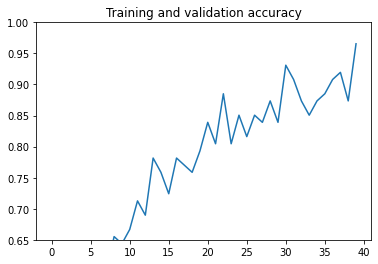

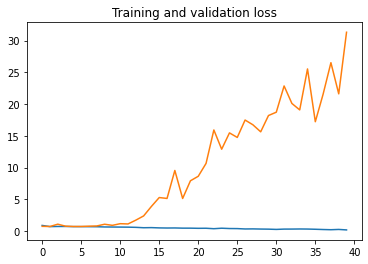

In [60]:
plot_history(history_augm, (0.65, 1))